In [32]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.13.0+cu117'

In [33]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [34]:
weight = 0.3
bias = 0.9

start = 0
end = 10
step = 0.1

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
len(X)

100

In [35]:
# split training and test data
split = int(0.8*len(X))

X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [36]:
def plot_data(xt, yt, xtest, ytest, ypred=None):
    plt.scatter(xt, yt, c='b', s=4, label="Training data")
    plt.scatter(xtest, ytest, c='g', s=4, label="Testing data")
    
    if ypred is not None:
        plt.scatter(xtest, ypred, c='r', s=4, label="Predicted data")


In [37]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

model = LinearModel()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.9252]])),
             ('linear_layer.bias', tensor([0.5017]))])

In [38]:
lossfn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

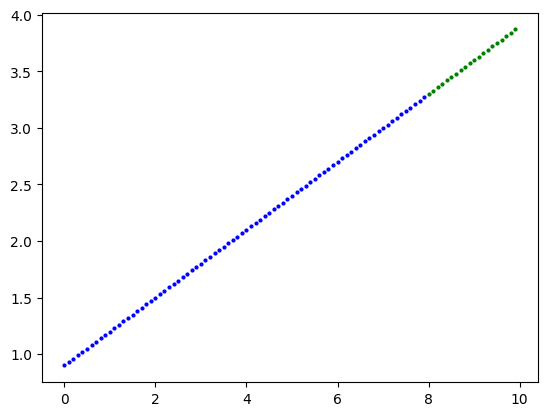

In [39]:
plot_data(X_train, y_train, X_test, y_test)

In [40]:
epochs = 400

model.to(device)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model.train()
    
    preds = model(X_train)
    
    loss = lossfn(preds, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        testpreds = model(X_test)
        testloss = lossfn(testpreds, y_test)
        
        if epoch % 20 == 0:
            print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {testloss}")


Epoch: 0 | Loss: 5.23793363571167 | Test Loss: 11.000506401062012
Epoch: 20 | Loss: 1.917433738708496 | Test Loss: 3.7300071716308594
Epoch: 40 | Loss: 0.10768475383520126 | Test Loss: 0.039378572255373
Epoch: 60 | Loss: 0.12619392573833466 | Test Loss: 0.03566253185272217
Epoch: 80 | Loss: 0.1110248789191246 | Test Loss: 0.08881352096796036
Epoch: 100 | Loss: 0.12638132274150848 | Test Loss: 0.06770419329404831
Epoch: 120 | Loss: 0.13156907260417938 | Test Loss: 0.062361765652894974
Epoch: 140 | Loss: 0.13401095569133759 | Test Loss: 0.06011192873120308
Epoch: 160 | Loss: 0.13401095569133759 | Test Loss: 0.06011192873120308
Epoch: 180 | Loss: 0.13401095569133759 | Test Loss: 0.06011192873120308
Epoch: 200 | Loss: 0.13401095569133759 | Test Loss: 0.06011192873120308
Epoch: 220 | Loss: 0.13401095569133759 | Test Loss: 0.06011192873120308
Epoch: 240 | Loss: 0.13401095569133759 | Test Loss: 0.06011192873120308
Epoch: 260 | Loss: 0.13401095569133759 | Test Loss: 0.06011192873120308
Epoch: 

In [41]:
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)

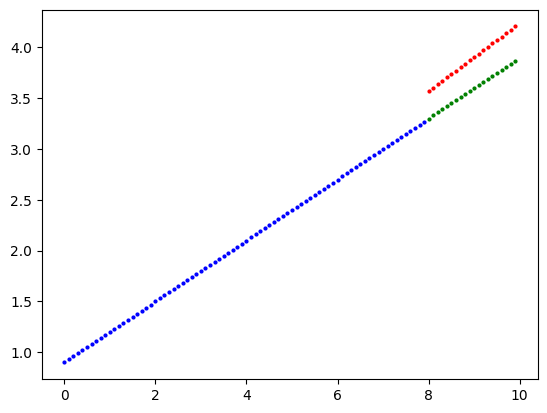

In [42]:
plot_data(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), y_preds.cpu())

In [45]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'exercise_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

In [46]:
loaded_model = LinearModel()
loaded_model.load_state_dict(torch.loadMODEL_SAVE_PATH)

TypeError: Module.load_state_dict() got an unexpected keyword argument 'f'